# Load Libraries

In [40]:
# plotting
import matplotlib.pyplot as plt

# manipulate data
import pandas as pd

# more plotting
import seaborn as sns

# library to access google trends
from pytrends.request import TrendReq

# make pandas types compatibile with matplotlibs
pd.plotting.register_matplotlib_converters()

# change pandas plotting backend
pd.options.plotting.backend = "plotly"

# create a dictionary to unpack to update plotly plots settings
# why can't it be as easy as with ggplot...
plotly_dict = dict(
    font_family="Yanone Kaffeesatz",
    template="none",
    title={"x": 0.05, "xanchor": "left"},
)

sns.set_style(style="darkgrid", rc={"axes.facecolor": "0.9", "grid.color": "0.8"})
sns.set_palette(palette="deep")
%matplotlib inline

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100

# Load Data

Let's have a look at the official data and at what we retrieved:

## Monthly Data 

If we choose the timespan from 2012/01/01 to the latest day available, we will retrieve monthly data. We set the frequency of this data to `"MS"`, which is month start.

In [34]:
draghi_monthly = pd.read_csv(
    "../02-data/python/gtrends-monthly-mario_draghi.csv",
    parse_dates=[0],
    index_col=[0],
    skiprows=1,
    squeeze=True
).asfreq("MS")

draghi_monthly

Month
2012-01-01     1
2012-02-01     1
2012-03-01    <1
2012-04-01     1
2012-05-01    <1
              ..
2021-04-01     7
2021-05-01     4
2021-06-01     3
2021-07-01     4
2021-08-01     3
Freq: MS, Name: Mario Draghi: (Italy), Length: 116, dtype: object

Another problem with this data is that it appears as string characters and we need to handle this.

In [38]:
draghi_monthly = draghi_monthly.str.replace("<1", "0").astype("int") + 1

In this way, we have removed zeroes and data ranges from 1 to 101.

<AxesSubplot:xlabel='Month'>

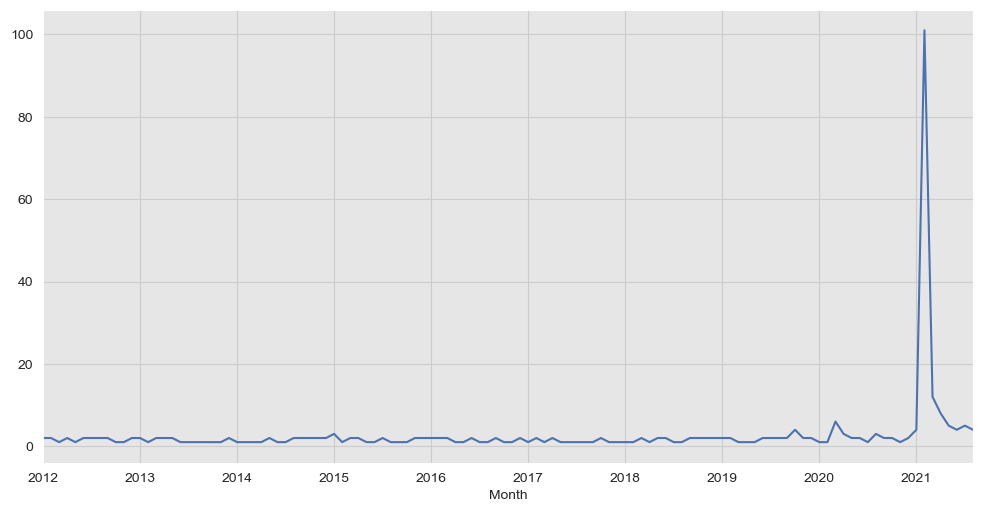

In [60]:
draghi_monthly.plot()

## Weekly Data

This is a bit more problematic: as it is retrieved in two pieces, we need to rescale them.

In [41]:
draghi_weekly_01 = pd.read_csv(
    "../02-data/python/gtrends-weekly-mario_draghi-01.csv",
    parse_dates=[0],
    index_col=[0],
    skiprows=1,
    squeeze=True
).asfreq(freq="W")

draghi_weekly_02 = pd.read_csv(
    "../02-data/python/gtrends-weekly-mario_draghi-02.csv",
    parse_dates=[0],
    index_col=[0],
    skiprows=1,
    squeeze=True
).asfreq(freq="W")

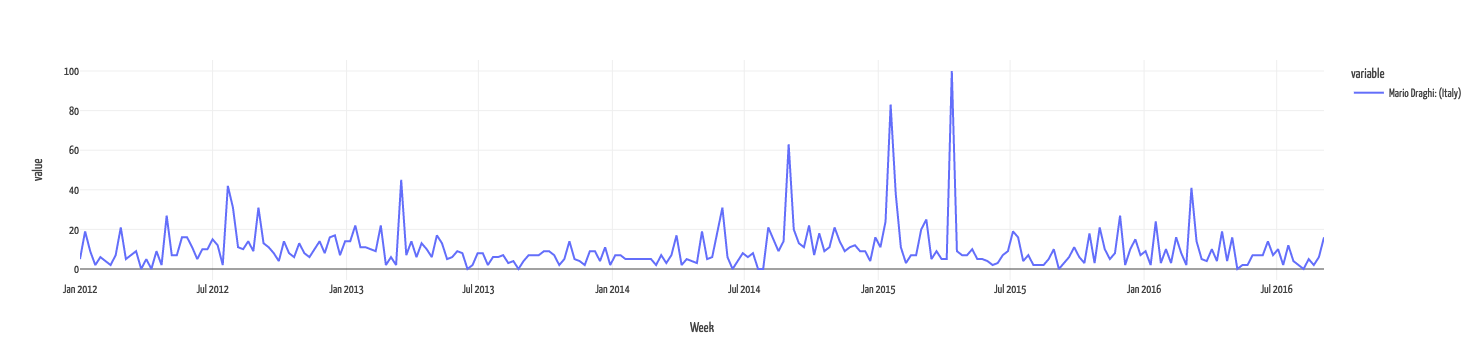

In [43]:
draghi_weekly_01.plot().update_layout(**plotly_dict)

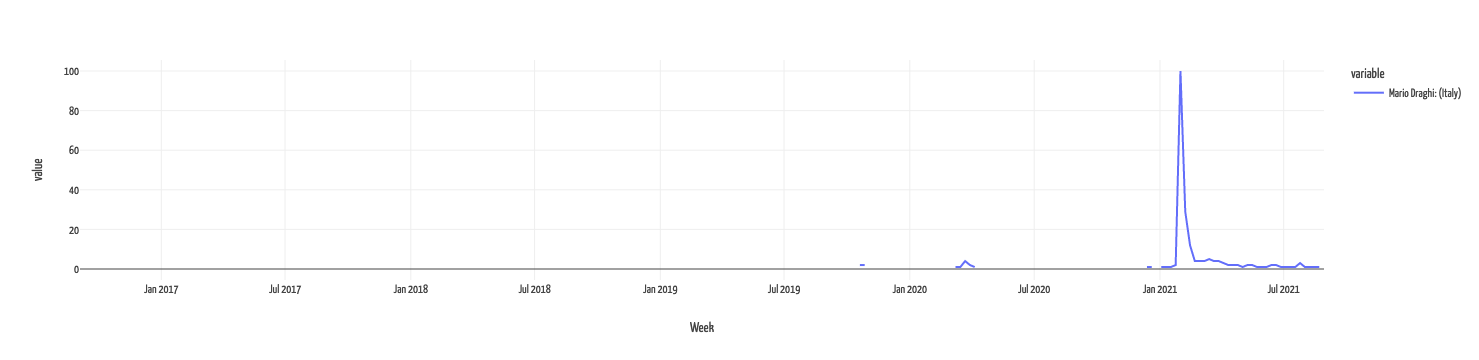

In [44]:
draghi_weekly_02.plot().update_layout(**plotly_dict)

The second data is of mixed types, we need to turn them into integers.

In [47]:
draghi_weekly_01 = draghi_weekly_01 + 1

In [49]:
draghi_weekly_02 = draghi_weekly_02.str.replace("<1", "0").astype("int") + 1

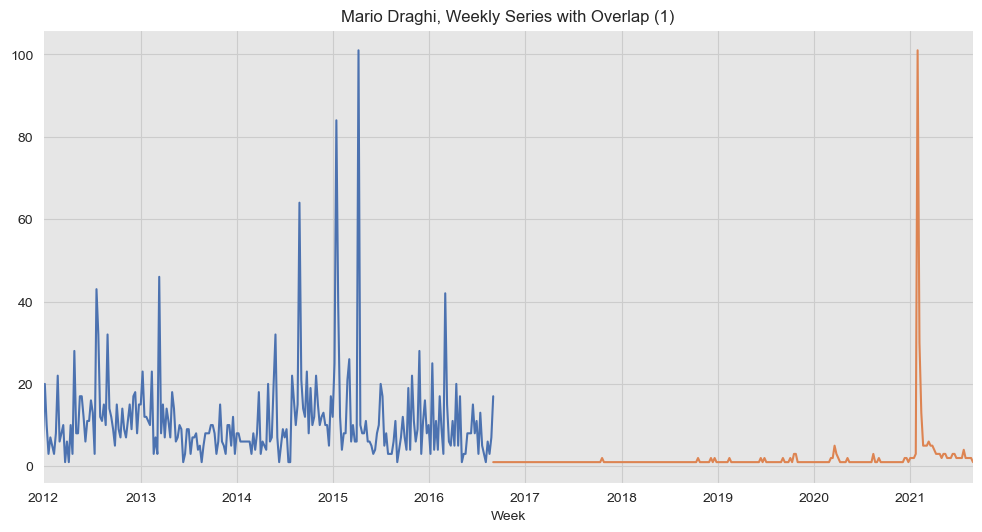

In [59]:
pd.options.plotting.backend = "matplotlib"

fig, ax = plt.subplots()

ax = draghi_weekly_01.plot()
ax = draghi_weekly_02.plot()

plt.title("Mario Draghi, Weekly Series with Overlap (1)")

plt.show()

# Overlap Months and Weeks

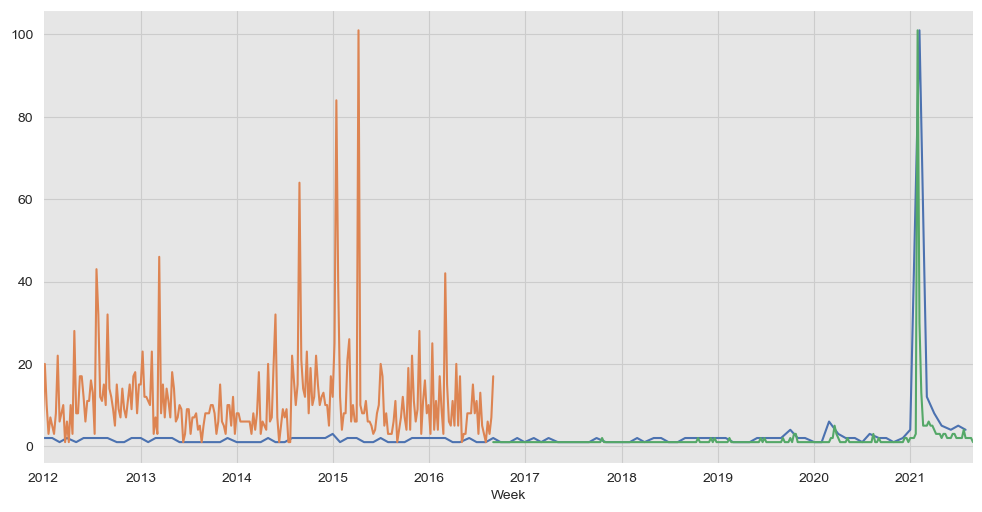

In [66]:
fig, ax = plt.subplots(1,1)

ax = draghi_monthly.plot()
ax = draghi_weekly_01.plot()
ax = draghi_weekly_02.plot()

# Retrieved Data

In [20]:

draghi_retrieved = pd.read_csv("../02-data/python/retrieved-daily-mario_draghi.csv", parse_dates=[0], index_col=[0])